Kolmogorov-Smirnov test statistic: 0.2622
Kolmogorov-Smirnov test p-value: 0.0000


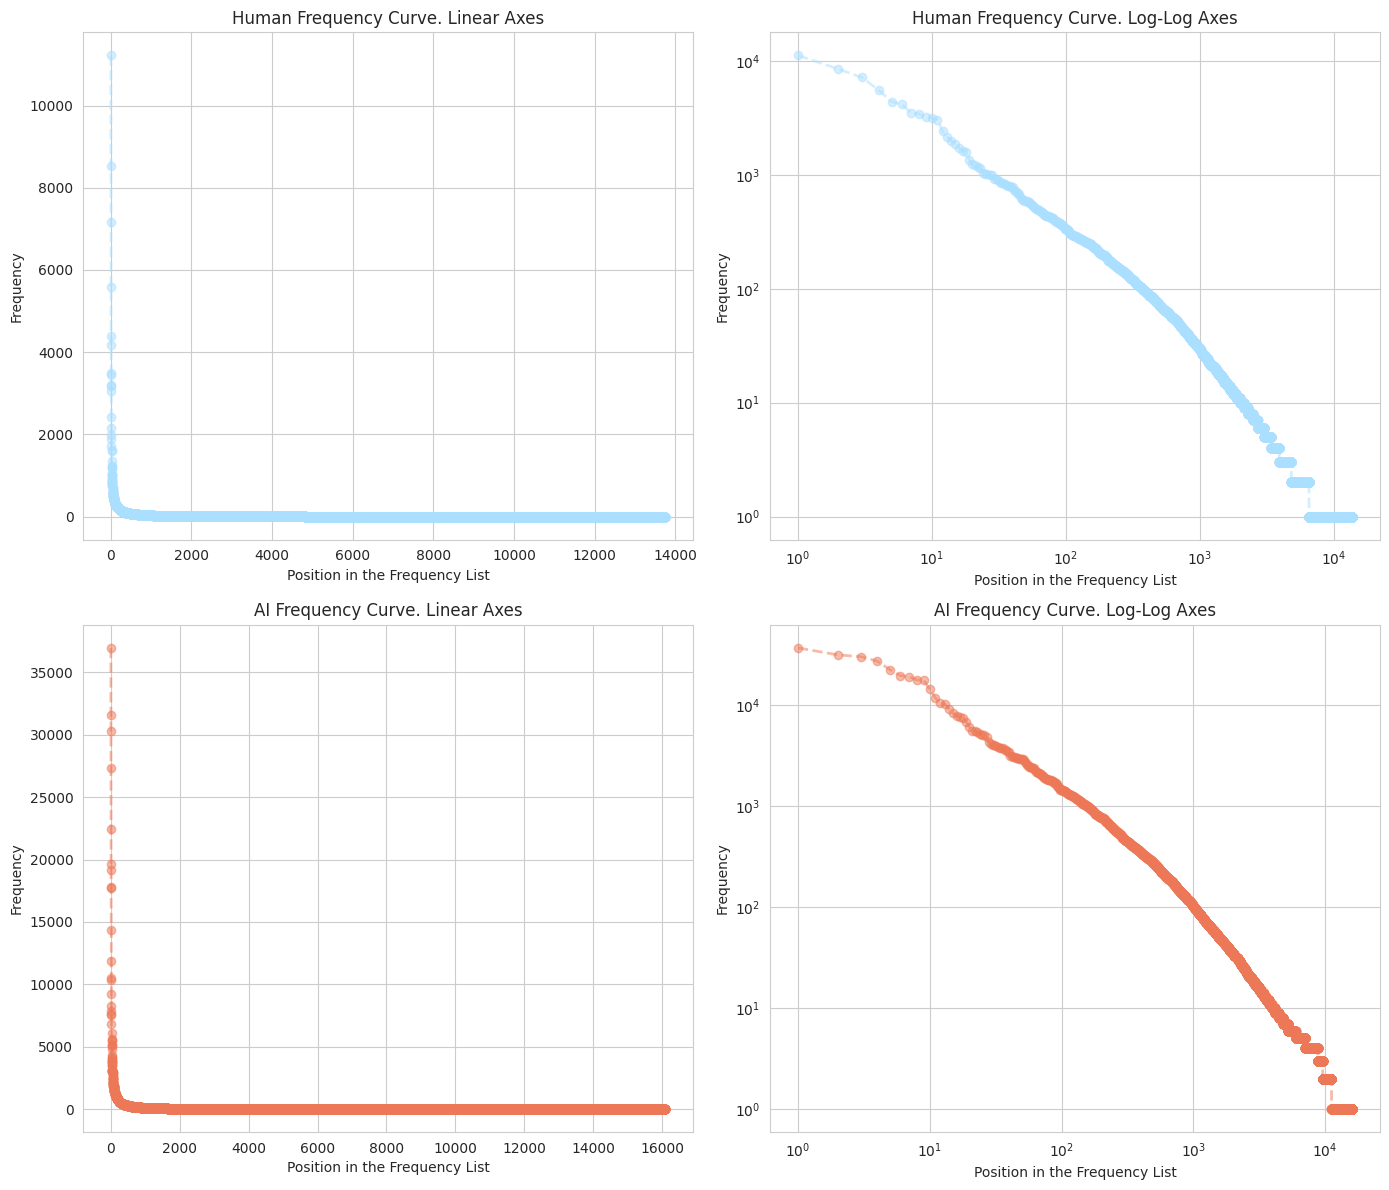

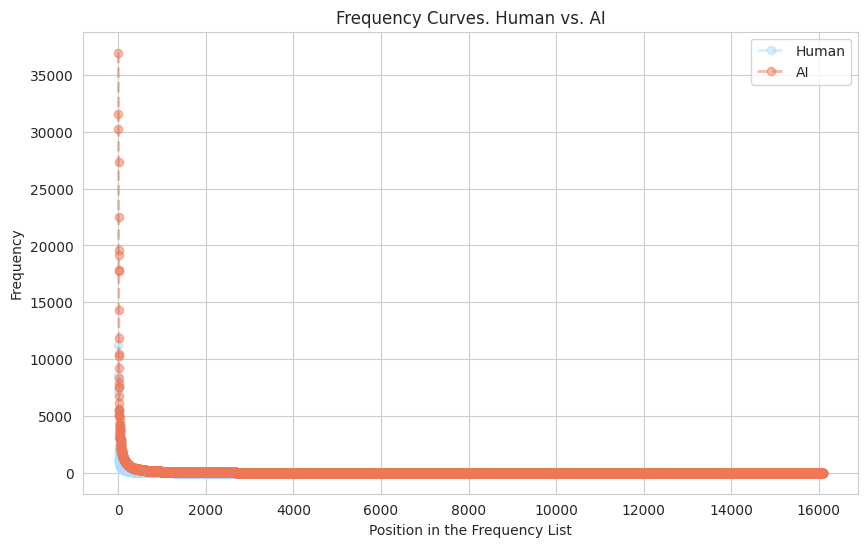

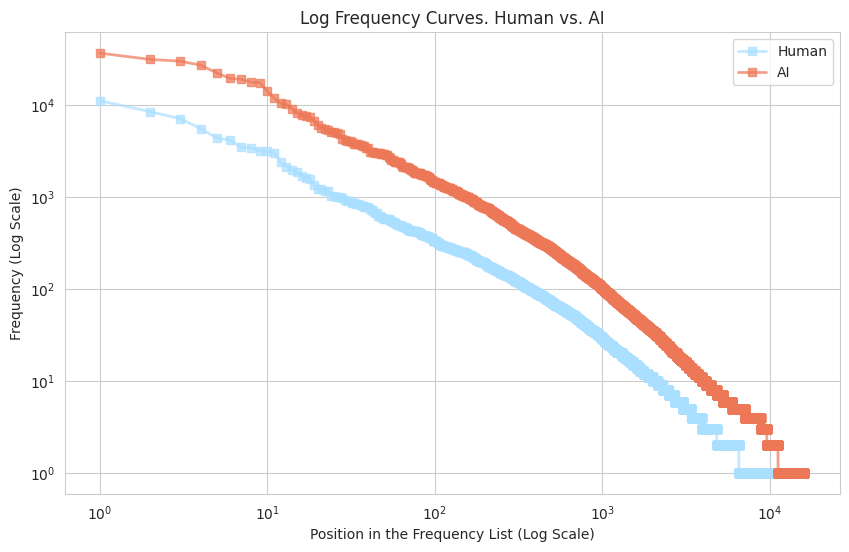

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import seaborn as sns

# This code is from Assignment 1

def zipfs_law(data):
    """
    Define a function which takes in a DataFrame containing text and labels, tokenizes text,
    calculates word frequencies for human and AI-generated texts, sorts the words in descending order,
    and performs the Kolmogorov-Smirnov test to assess the similarity or dissimilarity of word frequency distributions.
    Returns plots to visualize Zipf's law for the corpus and the results of the statistical test.

    :param data: DataFrame containing 'text' and 'labels' columns
    """
    # Split data into human and AI-generated texts
    human_texts = data[data['labels'] == 0]['text']
    ai_texts = data[data['labels'] == 1]['text']

    # Check if data is available for human and AI-generated texts
    if human_texts.empty or ai_texts.empty:
        print("Error: Input data is missing human or AI-generated texts.")
        return

    # Tokenize and count words
    human_words = ' '.join(human_texts).split()
    ai_words = ' '.join(ai_texts).split()

    human_words_counts = Counter(human_words)
    ai_words_counts = Counter(ai_words)

    # Sort words in descending order
    sorted_human_words_counts = sorted(human_words_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_ai_words_counts = sorted(ai_words_counts.items(), key=lambda x: x[1], reverse=True)

    # Define ranks (positions) and frequencies
    rank_sorted_human_words_counts = dict([(i + 1, count) for i, (word, count) in enumerate(sorted_human_words_counts)])
    rank_sorted_ai_words_counts = dict([(i + 1, count) for i, (word, count) in enumerate(sorted_ai_words_counts)])

    human_ranks = list(rank_sorted_human_words_counts.keys())
    human_frequencies = list(rank_sorted_human_words_counts.values())

    ai_ranks = list(rank_sorted_ai_words_counts.keys())
    ai_frequencies = list(rank_sorted_ai_words_counts.values())

    ks_statistic, p_value = ks_2samp(human_frequencies, ai_frequencies)  # Kolmogorov-Smirnov test
    print(f"Kolmogorov-Smirnov test statistic: {ks_statistic:.4f}")
    print(f"Kolmogorov-Smirnov test p-value: {p_value:.4f}")

    sns.set_style("whitegrid")

    fig, ((fig1, fig2), (fig3, fig4)) = plt.subplots(2, 2, figsize=(14, 12))

    plot_params = {'marker': 'o', 'linestyle': '--', 'linewidth': 2, 'alpha': 0.5}
    legend_param = {'xlabel': 'Position in the Frequency List', 'ylabel': 'Frequency'}

    fig1.plot(human_ranks, human_frequencies, color='#aadfff', **plot_params)
    fig1.set(title='Human Frequency Curve. Linear Axes', **legend_param)

    fig2.loglog(human_ranks, human_frequencies, color='#aadfff', **plot_params)
    fig2.set(title='Human Frequency Curve. Log-Log Axes', **legend_param)


    fig3.plot(ai_ranks, ai_frequencies, color='#ed7857', **plot_params)
    fig3.set(title='AI Frequency Curve. Linear Axes', **legend_param)

    fig4.loglog(ai_ranks, ai_frequencies, color='#ed7857', **plot_params)
    fig4.set(title='AI Frequency Curve. Log-Log Axes', **legend_param)

    plt.tight_layout()
    plt.savefig('freq_curves.png', dpi=300, bbox_inches='tight')
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.plot(human_ranks, human_frequencies, label='Human', color='#aadfff', marker='o', linestyle='--', linewidth=2, alpha=0.5)
    plt.plot(ai_ranks, ai_frequencies, label='AI', color='#ed7857', marker='o', linestyle='--', linewidth=2, alpha=0.5)
    plt.xlabel('Position in the Frequency List')
    plt.ylabel('Frequency')
    plt.title('Frequency Curves. Human vs. AI')
    plt.legend()
    plt.savefig('double_freq_curve.png', dpi=300, bbox_inches='tight')
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.loglog(human_ranks, human_frequencies, label='Human', color='#aadfff', marker='s', linestyle='-', linewidth=2, alpha=0.7)
    plt.loglog(ai_ranks, ai_frequencies, label='AI', color='#ed7857', marker='s', linestyle='-', linewidth=2, alpha=0.7)
    plt.xlabel('Position in the Frequency List (Log Scale)')
    plt.ylabel('Frequency (Log Scale)')
    plt.title('Log Frequency Curves. Human vs. AI')
    plt.legend()
    plt.savefig('double_freq_log_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

data = pd.read_csv('all_data.csv')

zipfs_law(data)